# Importing Libraries

In [1]:
import pandas as pd
import os
import numpy as np
#import pandas as pd
#from fancyimpute import KNN 
#import matplotlib.pyplot as plt
#import datetime
#from sklearn.model_selection import train_test_split
#from sklearn import metrics
#from sklearn.metrics import mean_squared_error
#from sklearn.model_selection import train_test_split, cross_val_score 
#from sklearn.linear_model import LinearRegression
#from sklearn.ensemble import RandomForestRegressor

In [2]:
cab_train = pd.read_csv("train_cab.csv")

In [3]:
cab_train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [4]:
cab_train.shape

(16067, 7)

In [5]:
cab_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
fare_amount          16043 non-null object
pickup_datetime      16067 non-null object
pickup_longitude     16067 non-null float64
pickup_latitude      16067 non-null float64
dropoff_longitude    16067 non-null float64
dropoff_latitude     16067 non-null float64
passenger_count      16012 non-null float64
dtypes: float64(5), object(2)
memory usage: 878.8+ KB


# Exploratory Data Analysis

In [6]:
cab_train['fare_amount'] = pd.to_numeric((cab_train['fare_amount']),errors='coerce')

In [7]:
cab_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16042.000000,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,15.015004,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,430.460945,10.578384,6.826587,10.575062,6.187087,60.844122
min,-3.000000,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,6.000000,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,8.500000,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,12.500000,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,54343.000000,40.766125,401.083332,40.802437,41.366138,5345.000000


In [8]:
cab_train.passenger_count.value_counts()

1.00       11259
2.00        2322
5.00        1045
3.00         676
4.00         329
6.00         302
0.00          57
43.00          2
53.00          2
0.12           1
1.30           1
531.20         1
345.00         1
456.00         1
87.00          1
55.00          1
58.00          1
236.00         1
535.00         1
536.00         1
537.00         1
554.00         1
5334.00        1
35.00          1
5345.00        1
557.00         1
354.00         1
Name: passenger_count, dtype: int64

In [9]:
#As we can see there are number of passengers present who are less than 1 and one is seen as fractional, which is impossible.
#Also there are many no. of passengers who are greater than 6 which is also practically imposible due to human input error
#Hence, we need to remove them

In [10]:
len(cab_train[cab_train['passenger_count'] < 1])

58

In [11]:
len(cab_train[cab_train['passenger_count'] > 6])

20

In [12]:
len(cab_train[cab_train['passenger_count'] == 1.30])

1

In [13]:
#In total , 79 variables gets removed due to invalid passenger count

In [14]:
cab_train = cab_train.drop(cab_train[cab_train['passenger_count'] < 1 ].index)

In [15]:
cab_train = cab_train.drop(cab_train[cab_train['passenger_count'] > 6 ].index)

In [16]:
cab_train = cab_train.drop(cab_train[cab_train['passenger_count'] == 1.30 ].index)

In [17]:
cab_train.shape

(15988, 7)

In [18]:
cab_train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [105]:
#cab_train['pickup_datetime'] = pd.to_numeric(cab_train['pickup_datetime'], errors = 'coerce')
#We just make it numeric to see absurd values

In [499]:
#cab_train.pickup_datetime.value_counts().nunique

<bound method IndexOpsMixin.nunique of 43.0    1
Name: pickup_datetime, dtype: int64>

In [19]:
cab_train = cab_train.drop(cab_train[cab_train['pickup_datetime'] == 43 ].index)

In [20]:
cab_train.shape

(15988, 7)

In [21]:
#dropping observations from fare Amount with negatives values and 0 values
cab_train = cab_train.drop(cab_train[cab_train.fare_amount == 0 ].index)
cab_train = cab_train.drop(cab_train[cab_train.fare_amount < 0].index)

In [22]:
cab_train.shape

(15984, 7)

In [23]:
#Dealing with latitudes and longitudes

In [24]:
#The latitude valid values are between -90 and 90 , the boundaries being inclusive The longitude valid values are bewtween -180 and 180 , the boundaries being inclusive as well.

In [25]:
#Excluding values other than these ranges
# for latitude range : -90<value<90
#for longitude raange : -180<value<180
cab_train=cab_train.drop(((cab_train[cab_train['pickup_longitude']<-180]) | (cab_train[cab_train['pickup_longitude']>180])).index,axis=0)
cab_train=cab_train.drop(((cab_train[cab_train['dropoff_longitude']<-180]) | (cab_train[cab_train['dropoff_longitude']>180])).index,axis=0)
cab_train=cab_train.drop(((cab_train[cab_train['pickup_latitude']<-90])| (cab_train[cab_train['pickup_latitude']>90])).index,axis=0)
cab_train=cab_train.drop(((cab_train[cab_train['dropoff_latitude']<-90])| (cab_train[cab_train['dropoff_latitude']>90])).index,axis=0)
cab_train.shape

(15983, 7)

In [26]:
#Removing observations whoose pickup and dropoff latitude and londitude are same
cab_train = cab_train[(cab_train['pickup_latitude'] != cab_train['dropoff_latitude']) & (cab_train['pickup_longitude'] != cab_train['dropoff_longitude'])]
cab_train.shape

(15522, 7)

# Missing value Analysis

In [27]:
#cab_train = cab_train.dropna()
#cab_train.shape
#We can also drop them as they are less than 1% but as per industry standards we are imputing them by mean method

In [28]:
############################################# Missing value Calculation #####################################################
total = cab_train.isnull().sum().sort_values(ascending=False)
percent = ((cab_train.isnull().sum()/cab_train.isnull().count()).sort_values(ascending=False))*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data = missing_data.sort_values('Total', ascending = True)
missing_data

,Total,Percent
dropoff_latitude,0,0.000000
dropoff_longitude,0,0.000000
pickup_latitude,0,0.000000
pickup_longitude,0,0.000000
pickup_datetime,0,0.000000
fare_amount,22,0.141734
passenger_count,55,0.354336


In [29]:
cab_train['fare_amount'].fillna(cab_train['fare_amount'].median(),inplace=True)
cab_train['passenger_count'].fillna(cab_train['passenger_count'].median(),inplace=True)

In [30]:
cab_train.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [31]:
cab_train['abs_longi']=abs(cab_train['pickup_longitude']-cab_train['dropoff_longitude'])
cab_train['abs_lat']=abs(cab_train['pickup_latitude']-cab_train['dropoff_latitude'])

In [32]:
#Calculatig distance from log and lati with great circle formula
def great_circle_distance(lon1,lat1,lon2,lat2):
    R = 6371000 # Approximate mean radius of earth (in m)
    
    # Convert decimal degrees to ridians
    lon1,lat1,lon2,lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    
    # Distance of lons and lats in radians
    dis_lon = lon2 - lon1
    dis_lat = lat2 - lat1
    
    # Haversine implementation
    a = np.sin(dis_lat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dis_lon/2)**2
    c = 2*np.arctan2(np.sqrt(a), np.sqrt(1-a))
    dis_m = R*c # Distance in meters
    dis_km = dis_m/1000 # Distance in km
    return dis_km
cab_train['distance'] = great_circle_distance(cab_train.pickup_longitude, cab_train.pickup_latitude, cab_train.dropoff_longitude, cab_train.dropoff_latitude)
cab_train.head(10)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_longi,abs_lat,distance
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0,0.002701,0.009041,1.030764
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0,0.036780,0.070701,8.450134
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0,0.008504,0.010708,1.389525
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0,0.004437,0.024949,2.799270
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0,0.011440,0.015754,1.999157
5,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1.0,0.028072,0.026603,3.787239
6,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1.0,0.006200,0.013180,1.555807
7,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1.0,0.038795,0.023090,4.155444
8,8.5,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1.0,0.013384,0.004915,1.253232
9,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2.0,0.010882,0.024265,2.849627


In [33]:
cab_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15522 entries, 0 to 16066
Data columns (total 10 columns):
fare_amount          15522 non-null float64
pickup_datetime      15522 non-null object
pickup_longitude     15522 non-null float64
pickup_latitude      15522 non-null float64
dropoff_longitude    15522 non-null float64
dropoff_latitude     15522 non-null float64
passenger_count      15522 non-null float64
abs_longi            15522 non-null float64
abs_lat              15522 non-null float64
distance             15522 non-null float64
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


In [34]:
cab_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_longi,abs_lat,distance
count,15522.000000,15522.000000,15522.000000,15522.000000,15522.000000,15522.000000,15522.000000,15522.000000,15522.000000
mean,15.151969,-73.863654,40.662764,-73.858417,40.663309,1.649723,0.123095,0.074505,15.067715
std,437.604351,3.263585,2.820696,3.306215,2.819707,1.266157,2.705111,1.460276,311.804535
min,0.010000,-74.438233,-74.006893,-74.227047,-74.006377,1.000000,0.000001,0.000001,0.000202
25%,6.000000,-73.992387,40.736528,-73.991363,40.736260,1.000000,0.006268,0.007240,1.278795
50%,8.500000,-73.982049,40.753322,-73.980559,40.754244,1.000000,0.012932,0.014452,2.196105
75%,12.500000,-73.968132,40.767800,-73.965410,40.768311,2.000000,0.024614,0.027255,3.950102
max,54343.000000,40.766125,41.366138,40.802437,41.366138,6.000000,74.010230,40.796543,8667.542104


# outlier analysis 

In [35]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [36]:
 ####################################
# user defined function that will plot boxplot and histogram for four columns 
def hist_and_box_plot(col1, col2, col3, col4, col5, col6, col7, data, bin1=10, bin2=30, bin3=30, bin4 = 30, bin5= 30, bin6= 30, bin7=30, sup =""): 
    fig, ax = plt.subplots(nrows = 2, ncols = 7, figsize= (14,7)) 
    super_title = fig.suptitle("Boxplot and Histogram: "+sup,fontsize='x-large') 
    plt.tight_layout() 
    sns.boxplot(y = col1, data = data, ax = ax[0][0]) 
    sns.boxplot(y = col2,data = data, ax = ax[0][1]) 
    sns.boxplot(y = col3, data = data, ax = ax[0][2]) 
    sns.boxplot(y = col4, data = data, ax = ax[0][3])
    sns.boxplot(y = col5, data = data, ax = ax[0][4])
    sns.boxplot(y = col6, data = data, ax = ax[0][5])
    sns.boxplot(y = col7, data = data, ax = ax[0][6])

    sns.distplot(data[col1], ax = ax[1][0], bins = bin1) 
    sns.distplot(data[col2], ax = ax[1][1], bins = bin2) 
    sns.distplot(data[col3], ax = ax[1][2], bins = bin3) 
    sns.distplot(data[col4], ax = ax[1][3], bins = bin4) 
    sns.distplot(data[col5], ax = ax[1][4], bins = bin5)
    sns.distplot(data[col6], ax = ax[1][5], bins = bin6)
    sns.distplot(data[col7], ax = ax[1][6], bins = bin7)
    fig.subplots_adjust(top = 0.90)
    plt.show() 

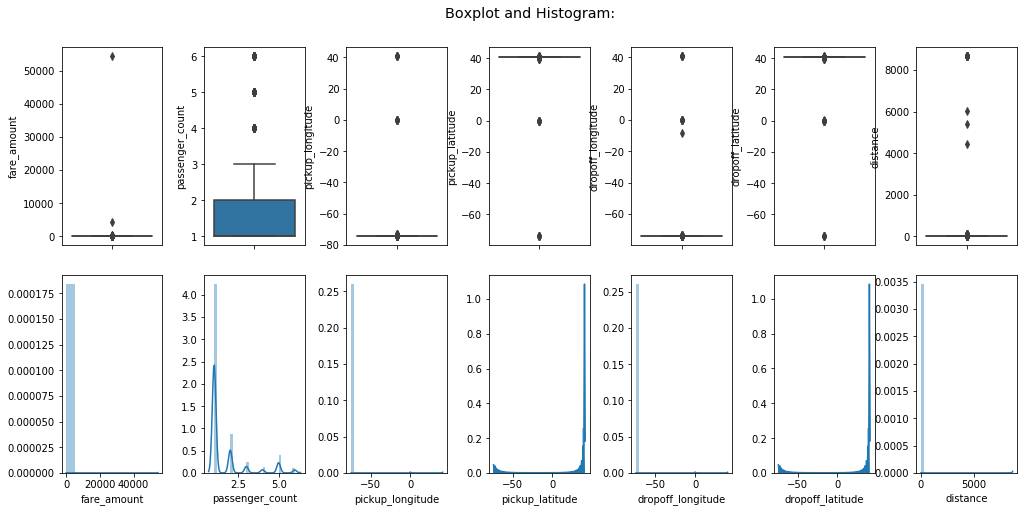

In [37]:
# plotting boxplot and histogram for our numerical variables 
hist_and_box_plot('fare_amount', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'distance',  bin1 = 10, data = cab_train) 

In [38]:
feature =  ["fare_amount","passenger_count","distance"]
for i in feature:
    print(i)
    q75, q25 = np.percentile(cab_train.loc[:,i], [75 ,25])
    iqr = q75 - q25
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    cab_train = cab_train.drop(cab_train[cab_train.loc[:,i] < minimum].index)
    cab_train = cab_train.drop(cab_train[cab_train.loc[:,i] > maximum].index)  

fare_amount
passenger_count
distance


In [39]:
cab_train.shape

(12103, 10)

In [40]:
cab_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_longi,abs_lat,distance
count,12103.000000,12103.000000,12103.000000,12103.000000,12103.000000,12103.000000,12103.000000,12103.000000,12103.000000
mean,8.535993,-73.913983,40.685909,-73.912788,40.686031,1.253821,0.014024,0.015911,2.287497
std,3.702064,2.758539,2.758920,2.758676,2.758448,0.532862,0.011346,0.012162,1.426121
min,0.010000,-74.229138,-74.006893,-74.227047,-73.994392,1.000000,0.000001,0.000001,0.000202
25%,5.700000,-73.992514,40.738155,-73.991651,40.738215,1.000000,0.005627,0.006572,1.194512
50%,7.700000,-73.982376,40.753394,-73.981492,40.754270,1.000000,0.011330,0.012770,1.922012
75%,10.500000,-73.970210,40.766886,-73.969162,40.767226,1.000000,0.019538,0.022567,3.082047
max,22.100000,40.766125,41.035688,40.802437,41.028363,3.000000,0.076890,0.057894,6.494332


In [41]:
# Defining function to extract features from pickup_datetime variable
def date_columns(cab_train):
    cab_train['pickup_datetime'] = pd.to_datetime(cab_train['pickup_datetime'],errors='coerce', yearfirst=True)
    cab_train['year'] = cab_train['pickup_datetime'].dt.year
    cab_train['month'] = cab_train['pickup_datetime'].dt.month
    cab_train['day'] = cab_train['pickup_datetime'].dt.day
    cab_train['weekday'] = cab_train['pickup_datetime'].dt.weekday
    cab_train['hour'] = cab_train['pickup_datetime'].dt.hour

In [42]:
date_columns(cab_train)

In [43]:
cab_train = cab_train.dropna(subset=['pickup_datetime'])

In [44]:
cab_train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_longi,abs_lat,distance,year,month,day,weekday,hour
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0,0.002701,0.009041,1.030764,2009.0,6.0,15.0,0.0,17.0
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0,0.008504,0.010708,1.389525,2011.0,8.0,18.0,3.0,0.0
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0,0.004437,0.024949,2.799270,2012.0,4.0,21.0,5.0,4.0
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0,0.011440,0.015754,1.999157,2010.0,3.0,9.0,1.0,7.0
5,12.1,2011-01-06 09:50:45+00:00,-74.000964,40.731630,-73.972892,40.758233,1.0,0.028072,0.026603,3.787239,2011.0,1.0,6.0,3.0,9.0


In [45]:
cab_train.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                  float64
abs_longi                        float64
abs_lat                          float64
distance                         float64
year                             float64
month                            float64
day                              float64
weekday                          float64
hour                             float64
dtype: object

In [48]:
cab_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_longi,abs_lat,distance,year,month,day,weekday,hour
count,12102.000000,12102.000000,12102.000000,12102.000000,12102.000000,12102.000000,12102.000000,12102.000000,12102.000000,12102.000000,12102.000000,12102.000000,12102.000000,12102.000000
mean,8.535748,-73.913977,40.685906,-73.912782,40.686025,1.253842,0.014025,0.015910,2.287397,2011.725004,6.222773,15.676500,3.003553,13.633201
std,3.702119,2.758653,2.759034,2.758790,2.758561,0.532879,0.011346,0.012162,1.426138,1.873991,3.448266,8.669922,1.963405,6.401780
min,0.010000,-74.229138,-74.006893,-74.227047,-73.994392,1.000000,0.000001,0.000001,0.000202,2009.000000,1.000000,1.000000,0.000000,0.000000
25%,5.700000,-73.992514,40.738163,-73.991651,40.738214,1.000000,0.005627,0.006572,1.194453,2010.000000,3.000000,8.000000,1.000000,9.000000
50%,7.700000,-73.982377,40.753395,-73.981492,40.754269,1.000000,0.011330,0.012769,1.921950,2012.000000,6.000000,16.000000,3.000000,14.000000
75%,10.500000,-73.970206,40.766887,-73.969162,40.767230,1.000000,0.019538,0.022566,3.081749,2013.000000,9.000000,23.000000,5.000000,19.000000
max,22.100000,40.766125,41.035688,40.802437,41.028363,3.000000,0.076890,0.057894,6.494332,2015.000000,12.000000,31.000000,6.000000,23.000000


In [49]:
cab_train = cab_train.drop('pickup_datetime',axis = 1)

In [50]:
cab_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12102 entries, 0 to 16066
Data columns (total 14 columns):
fare_amount          12102 non-null float64
pickup_longitude     12102 non-null float64
pickup_latitude      12102 non-null float64
dropoff_longitude    12102 non-null float64
dropoff_latitude     12102 non-null float64
passenger_count      12102 non-null float64
abs_longi            12102 non-null float64
abs_lat              12102 non-null float64
distance             12102 non-null float64
year                 12102 non-null float64
month                12102 non-null float64
day                  12102 non-null float64
weekday              12102 non-null float64
hour                 12102 non-null float64
dtypes: float64(14)
memory usage: 1.4 MB


In [51]:
cab_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_longi,abs_lat,distance,year,month,day,weekday,hour
count,12102.000000,12102.000000,12102.000000,12102.000000,12102.000000,12102.000000,12102.000000,12102.000000,12102.000000,12102.000000,12102.000000,12102.000000,12102.000000,12102.000000
mean,8.535748,-73.913977,40.685906,-73.912782,40.686025,1.253842,0.014025,0.015910,2.287397,2011.725004,6.222773,15.676500,3.003553,13.633201
std,3.702119,2.758653,2.759034,2.758790,2.758561,0.532879,0.011346,0.012162,1.426138,1.873991,3.448266,8.669922,1.963405,6.401780
min,0.010000,-74.229138,-74.006893,-74.227047,-73.994392,1.000000,0.000001,0.000001,0.000202,2009.000000,1.000000,1.000000,0.000000,0.000000
25%,5.700000,-73.992514,40.738163,-73.991651,40.738214,1.000000,0.005627,0.006572,1.194453,2010.000000,3.000000,8.000000,1.000000,9.000000
50%,7.700000,-73.982377,40.753395,-73.981492,40.754269,1.000000,0.011330,0.012769,1.921950,2012.000000,6.000000,16.000000,3.000000,14.000000
75%,10.500000,-73.970206,40.766887,-73.969162,40.767230,1.000000,0.019538,0.022566,3.081749,2013.000000,9.000000,23.000000,5.000000,19.000000
max,22.100000,40.766125,41.035688,40.802437,41.028363,3.000000,0.076890,0.057894,6.494332,2015.000000,12.000000,31.000000,6.000000,23.000000


In [52]:
cab_train['weekday'].value_counts()

5.0    1853
4.0    1776
3.0    1770
2.0    1767
1.0    1746
0.0    1625
6.0    1565
Name: weekday, dtype: int64

In [53]:
cab_train['year'].value_counts()

2013.0    1916
2010.0    1911
2009.0    1897
2012.0    1891
2011.0    1863
2014.0    1740
2015.0     884
Name: year, dtype: int64

In [54]:
cab_train['day'].value_counts()

10.0    443
7.0     440
8.0     438
22.0    436
12.0    429
16.0    424
23.0    420
21.0    417
20.0    413
13.0    408
6.0     406
15.0    405
2.0     403
9.0     402
24.0    402
25.0    397
19.0    397
11.0    396
28.0    391
18.0    386
27.0    382
17.0    377
3.0     374
26.0    372
14.0    371
1.0     368
4.0     364
5.0     351
30.0    339
29.0    323
31.0    228
Name: day, dtype: int64

In [55]:
cab_train['month'].value_counts()

5.0     1176
6.0     1137
1.0     1133
3.0     1133
4.0     1099
2.0     1018
12.0     942
10.0     929
11.0     928
7.0      891
9.0      875
8.0      841
Name: month, dtype: int64

In [56]:
cab_train['hour'].value_counts()

19.0    785
18.0    768
20.0    738
21.0    693
22.0    690
13.0    623
12.0    611
9.0     608
17.0    595
14.0    588
23.0    573
15.0    570
11.0    566
8.0     565
10.0    507
7.0     503
16.0    471
0.0     414
1.0     325
6.0     246
2.0     227
3.0     197
4.0     136
5.0     103
Name: hour, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000040A392A08>,
      dtype=object)

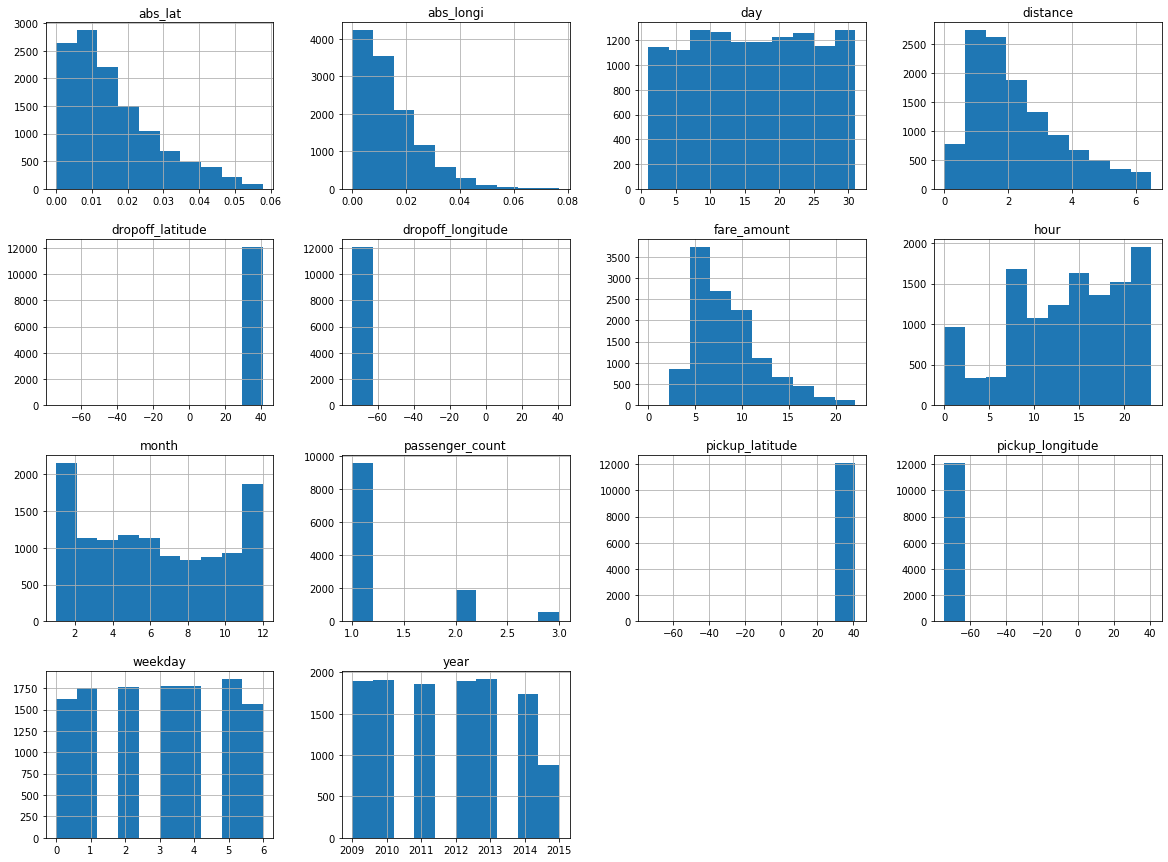

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
cab_train.hist(bins=10, figsize = (20,15))

In [58]:
corr_matrix = cab_train.corr()
corr_matrix['fare_amount'].sort_values(ascending=False)

fare_amount          1.000000
distance             0.800122
abs_lat              0.678624
abs_longi            0.574347
year                 0.180738
month                0.029659
dropoff_longitude    0.018284
pickup_longitude     0.017859
passenger_count      0.017495
hour                 0.009349
weekday              0.008105
pickup_latitude     -0.018385
dropoff_latitude    -0.018627
day                 -0.020788
Name: fare_amount, dtype: float64

In [59]:
cab_train.shape

(12102, 14)

In [64]:
#function for printing all variables for normalization analysis\n",
def plot_displot(cab_train,features):
    q = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(1,2,figsize=(15,15))
    for feature in features:
        q += 1
        plt.subplot(2,2,q)
        sns.distplot(cab_train[feature])
        plt.xlabel(feature, fontsize=9)
    plt.show(); 

<Figure size 432x288 with 0 Axes>

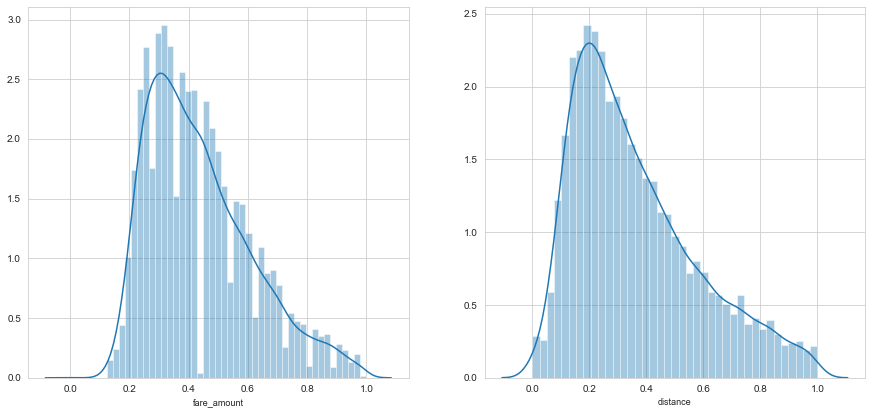

In [64]:
#Normality check
cnames = ["fare_amount","distance"]
plot_displot(cab_train.iloc[:],cnames)
#sns.hist(cabfare['pickup_latitude'], bins=100)"

In [65]:
#Nomalisation
cnames = ["fare_amount","distance"]
for i in cnames:
    print(i)
    cab_train[i] = (cab_train[i] - min(cab_train[i]))/(max(cab_train[i]) - min(cab_train[i]))

fare_amount
distance


In [60]:
cab_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_longi,abs_lat,distance,year,month,day,weekday,hour
count,12102.000000,12102.000000,12102.000000,12102.000000,12102.000000,12102.000000,12102.000000,12102.000000,12102.000000,12102.000000,12102.000000,12102.000000,12102.000000,12102.000000
mean,8.535748,-73.913977,40.685906,-73.912782,40.686025,1.253842,0.014025,0.015910,2.287397,2011.725004,6.222773,15.676500,3.003553,13.633201
std,3.702119,2.758653,2.759034,2.758790,2.758561,0.532879,0.011346,0.012162,1.426138,1.873991,3.448266,8.669922,1.963405,6.401780
min,0.010000,-74.229138,-74.006893,-74.227047,-73.994392,1.000000,0.000001,0.000001,0.000202,2009.000000,1.000000,1.000000,0.000000,0.000000
25%,5.700000,-73.992514,40.738163,-73.991651,40.738214,1.000000,0.005627,0.006572,1.194453,2010.000000,3.000000,8.000000,1.000000,9.000000
50%,7.700000,-73.982377,40.753395,-73.981492,40.754269,1.000000,0.011330,0.012769,1.921950,2012.000000,6.000000,16.000000,3.000000,14.000000
75%,10.500000,-73.970206,40.766887,-73.969162,40.767230,1.000000,0.019538,0.022566,3.081749,2013.000000,9.000000,23.000000,5.000000,19.000000
max,22.100000,40.766125,41.035688,40.802437,41.028363,3.000000,0.076890,0.057894,6.494332,2015.000000,12.000000,31.000000,6.000000,23.000000


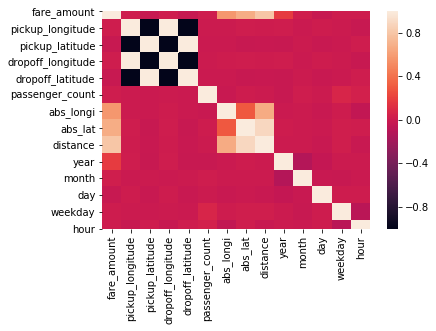

In [61]:
sns.heatmap(cab_train.corr())

In [62]:
#checking importance of feature 
drop_col = ['fare_amount','day', 'weekday', 'hour', 'month', 'year'] 
from sklearn.ensemble import ExtraTreesRegressor 
reg = ExtraTreesRegressor(n_estimators=200) 
X = cab_train.drop(drop_col, axis =1) 
y = cab_train['fare_amount'] 
reg.fit(X, y) 
imp_feat = pd.DataFrame({'Feature': cab_train.drop(drop_col, axis =1).columns, 'importance':reg.feature_importances_}) 
imp_feat.sort_values(by = 'importance', ascending=False).reset_index(drop = True)

,Feature,importance
0,distance,0.494529
1,abs_lat,0.186465
2,abs_longi,0.119874
3,dropoff_latitude,0.047664
4,pickup_longitude,0.046024
5,dropoff_longitude,0.045038
6,pickup_latitude,0.043105
7,passenger_count,0.017301


# DATA MODELLING

In [63]:
#********************************** Modeling *****************************************************************
from sklearn import metrics
#function to check performance  
def performance(actual, predict):
    print('MSE:', metrics.mean_squared_error(actual, predict)) 
    print('RMSE:', np.sqrt(metrics.mean_squared_error(actual, predict))) 
    print('MAPE:',np.mean(np.abs((actual-predict)/actual))*100)
    print('R-Sq:', metrics.r2_score(actual, predict))

In [64]:
cab_test = pd.read_csv("test.csv")

In [65]:
#********************************** Sampling *****************************************************************
##Sampling: dividing  Test and train data  using sklearn 
from sklearn.model_selection import train_test_split,KFold, cross_val_score, cross_val_predict
import copy
#moving the amount to last variable
cab_train['amount']= copy.copy(cab_train['fare_amount'])
cab_train = cab_train.drop(['fare_amount'], axis=1)

#Random sample selection 
train, test = train_test_split(cab_train, test_size = 0.20, random_state = 100)
cab_train.shape, test.shape , train.shape, cab_test.shape

((12102, 14), (2421, 14), (9681, 14), (9914, 6))

In [66]:
for col in train.columns: 
    print(col) 

pickup_longitude
pickup_latitude
dropoff_longitude
dropoff_latitude
passenger_count
abs_longi
abs_lat
distance
year
month
day
weekday
hour
amount


In [67]:
#1. ############################################ Decision Tree ############################################################
###Model 1
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth =5, random_state=123).fit(train.iloc[:,4:13],train.iloc[:,13])
prediction_dt = dt.predict(test.iloc[:,4:13])

#error matrix
performance(test.iloc[:,13],prediction_dt)
print('                           ')
print('Perdicted Vs Actual value: ')
prediction_dt[1], test.iloc[1,13]

MSE: 4.281722989692502
RMSE: 2.069232463908418
MAPE: 17.656514607126343
R-Sq: 0.6849284807676522
                           
Perdicted Vs Actual value: 


(5.374601328903655, 5.5)

In [68]:
dt.score(train.iloc[:,4:13],train.iloc[:,13])

0.699106943786516

In [69]:
#2. ############################################ Random Forest ############################################################
###Model 2
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 126).fit(train.iloc[:,4:13],train.iloc[:,13])
prediction_rf = rf.predict(test.iloc[:,4:13])

#error matrix
performance(test.iloc[:,13],prediction_rf)
print('                           ')
print('Perdicted Vs Actual value: ')
prediction_rf[1], test.iloc[1,13]

MSE: 4.0200776455472935
RMSE: 2.0050131285224277
MAPE: 17.261527722740848
R-Sq: 0.7041817104320547
                           
Perdicted Vs Actual value: 


(4.471299999999999, 5.5)

In [70]:
rf.score(train.iloc[:,4:13],train.iloc[:,13])

0.959212918389846

Text(0, 0.5, 'Importance')

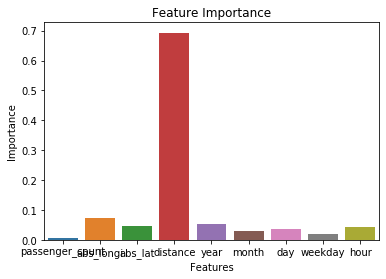

In [71]:
#Feature importance plotting
names=list(train)
names = names[4:13]

sns.barplot(x = names ,y = rf.feature_importances_)  

plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')

In [72]:
#3. ############################################ Linear Regression ############################
###Model 3
from sklearn.linear_model import LinearRegression
ln = LinearRegression().fit(train.iloc[:,4:13],train.iloc[:,13])
prediction_slr = ln.predict(test.iloc[:,4:13])

#error matrix
performance(test.iloc[:,13],prediction_slr)
print('                           ')
print('Perdicted Vs Actual value: ')
prediction_slr[1], test.iloc[1,13]

MSE: 4.469673518323845
RMSE: 2.1141602395097316
MAPE: 17.79250219344215
R-Sq: 0.6710981001617706
                           
Perdicted Vs Actual value: 


(5.440478125631103, 5.5)

In [73]:
ln.score(train.iloc[:,4:13],train.iloc[:,13])

0.6881024740898583

In [74]:
#4. ############################################ Ridge Regression ############################
###Model 4
from sklearn import linear_model
ln1 = linear_model.Ridge(alpha=.5).fit(train.iloc[:,4:13],train.iloc[:,13])
prediction_slr1 = ln1.predict(test.iloc[:,4:13])

#error matrix
performance(test.iloc[:,13],prediction_slr1)
print('                           ')
print('Perdicted Vs Actual value: ')
prediction_slr1[1], test.iloc[1,13]

MSE: 4.534504292693583
RMSE: 2.129437553133123
MAPE: 18.116122844831946
R-Sq: 0.6663275135024151
                           
Perdicted Vs Actual value: 


(5.458716239628529, 5.5)

In [75]:
ln1.score(train.iloc[:,4:13],train.iloc[:,13])

0.6819312666962464

Text(0, 0.5, 'Predicted values')

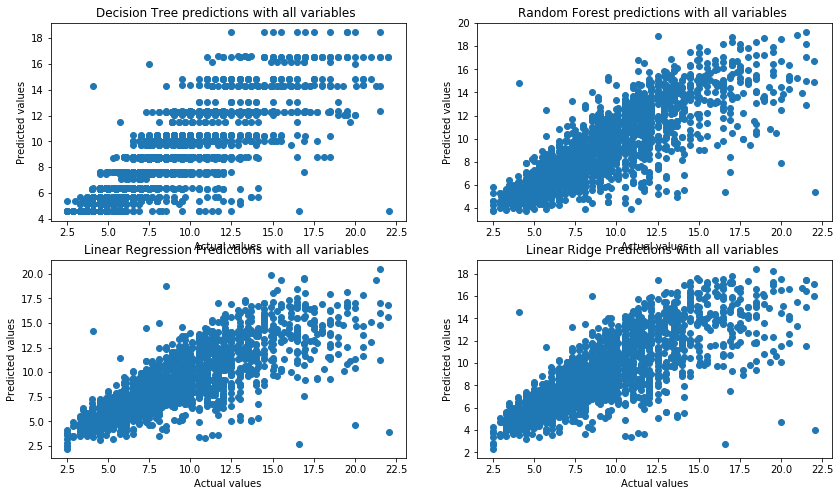

In [76]:
#Ploting to understand the spread of predicted data for modeling 
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
plt.title('Decision Tree predictions with all variables ')
plt.scatter(test.iloc[:,13] , prediction_dt)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.subplot(2,2,2)
plt.title('Random Forest predictions with all variables ')
plt.scatter(test.iloc[:,13] , prediction_rf)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.subplot(2,2,3)
plt.title('Linear Regression Predictions with all variables ')
plt.scatter(test.iloc[:,13] , prediction_slr)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.subplot(2,2,4)
plt.title('Linear Ridge Predictions with all variables ')
plt.scatter(test.iloc[:,13] , prediction_slr1)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

In [83]:
#As per comparision we should choose Random forest for my given test dataset

# Implementation on Test dataset

In [77]:
cab_test['pickup_datetime'] = pd.to_datetime(cab_test['pickup_datetime'], errors='coerce')
cab_test = cab_test.dropna(subset=['pickup_datetime'])

In [78]:
cab_test.isnull().sum().sort_values(ascending=False) 

passenger_count      0
dropoff_latitude     0
dropoff_longitude    0
pickup_latitude      0
pickup_longitude     0
pickup_datetime      0
dtype: int64

In [79]:
cab_test['year']=cab_test['pickup_datetime'].dt.year
cab_test['month']=cab_test['pickup_datetime'].dt.month
cab_test['weekday']=cab_test['pickup_datetime'].dt.weekday
cab_test['hour']=cab_test['pickup_datetime'].dt.hour
cab_test['day']=cab_test['pickup_datetime'].dt.day

In [80]:
cab_test['abs_longi']=abs(cab_test['pickup_longitude']-cab_test['dropoff_longitude'])
cab_test['abs_lat']=abs(cab_test['pickup_latitude']-cab_test['dropoff_latitude'])

In [81]:
cab_test['distance'] = great_circle_distance(cab_test.pickup_longitude, cab_test.pickup_latitude, cab_test.dropoff_longitude, cab_test.dropoff_latitude)

In [82]:
cab_test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,weekday,hour,day,abs_longi,abs_lat,distance
0,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,1,13,27,0.008110,0.019970,2.323259
1,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,1,13,27,0.012024,0.019817,2.425353
2,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,5,11,8,0.002870,0.005121,0.618628
3,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,5,21,1,0.009288,0.016172,1.961033
4,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,5,21,1,0.022519,0.045348,5.387301


In [83]:
cab_test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,weekday,hour,day,abs_longi,abs_lat,distance
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273,2011.815816,6.857979,2.852834,13.467420,16.194170,0.023348,0.022133,3.435371
std,0.042774,0.033541,0.039072,0.035435,1.278747,1.803347,3.353272,1.994451,6.868584,8.838482,0.036719,0.025589,3.972374
min,-74.252193,40.573143,-74.263242,40.568973,1.000000,2009.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000,2010.000000,4.000000,1.000000,8.000000,9.000000,0.006354,0.007279,1.298277
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000,2012.000000,7.000000,3.000000,15.000000,16.000000,0.013123,0.014715,2.217412
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000,2014.000000,10.000000,5.000000,19.000000,25.000000,0.024557,0.028261,4.045302
max,-72.986532,41.709555,-72.990963,41.696683,6.000000,2015.000000,12.000000,6.000000,23.000000,31.000000,0.849168,0.633213,99.996040


In [84]:
cab_test.describe(include = 'all')

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,weekday,hour,day,abs_longi,abs_lat,distance
count,9914,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
unique,1753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-12-13 22:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2009-01-01 11:04:24+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2015-06-30 20:03:50+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,-73.974722,40.751041,-73.973657,40.751743,1.671273,2011.815816,6.857979,2.852834,13.467420,16.194170,0.023348,0.022133,3.435371
std,NaN,0.042774,0.033541,0.039072,0.035435,1.278747,1.803347,3.353272,1.994451,6.868584,8.838482,0.036719,0.025589,3.972374
min,NaN,-74.252193,40.573143,-74.263242,40.568973,1.000000,2009.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,NaN,-73.992501,40.736125,-73.991247,40.735254,1.000000,2010.000000,4.000000,1.000000,8.000000,9.000000,0.006354,0.007279,1.298277


In [85]:
cab_test = cab_test.drop(['pickup_datetime','pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude'], axis=1)

In [86]:
cab_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9914 entries, 0 to 9913
Data columns (total 9 columns):
passenger_count    9914 non-null int64
year               9914 non-null int64
month              9914 non-null int64
weekday            9914 non-null int64
hour               9914 non-null int64
day                9914 non-null int64
abs_longi          9914 non-null float64
abs_lat            9914 non-null float64
distance           9914 non-null float64
dtypes: float64(3), int64(6)
memory usage: 774.5 KB


In [87]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 127).fit(train.iloc[:,4:13],train.iloc[:,13])
amount = rf.predict(cab_test)

cab_test['amount'] = amount

In [88]:
cab_test.head()

,passenger_count,year,month,weekday,hour,day,abs_longi,abs_lat,distance,amount
0,1,2015,1,1,13,27,0.008110,0.019970,2.323259,6.9140
1,1,2015,1,1,13,27,0.012024,0.019817,2.425353,6.9140
2,1,2011,10,5,11,8,0.002870,0.005121,0.618628,15.2854
3,1,2012,12,5,21,1,0.009288,0.016172,1.961033,15.0267
4,1,2012,12,5,21,1,0.022519,0.045348,5.387301,15.2787


In [89]:
cab_test.to_csv("Fare_Amount_Predicted.csv")

Text(0.5, 1.0, 'fare_amount')

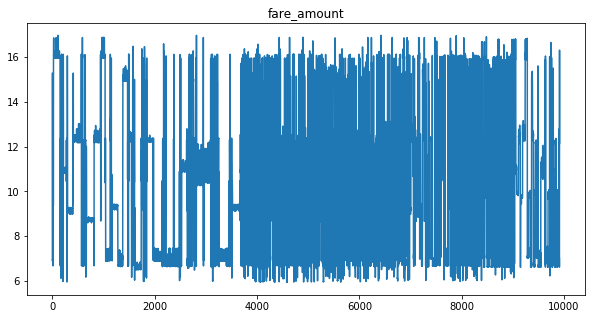

In [90]:
fig_size = plt.rcParams['figure.figsize']
fig_size[0] = 10
fig_size[1] = 5
plt.plot(cab_test['amount'])
plt.title('fare_amount')

In [91]:
cab_test

,passenger_count,year,month,weekday,hour,day,abs_longi,abs_lat,distance,amount
0,1,2015,1,1,13,27,0.008110,0.019970,2.323259,6.9140
1,1,2015,1,1,13,27,0.012024,0.019817,2.425353,6.9140
2,1,2011,10,5,11,8,0.002870,0.005121,0.618628,15.2854
3,1,2012,12,5,21,1,0.009288,0.016172,1.961033,15.0267
4,1,2012,12,5,21,1,0.022519,0.045348,5.387301,15.2787
...,...,...,...,...,...,...,...,...,...,...
9909,6,2015,5,6,12,10,0.012482,0.016609,2.124874,11.3387
9910,6,2015,1,0,17,12,0.014702,0.027229,3.270969,6.6130
9911,6,2015,4,6,20,19,0.201859,0.079597,19.183942,12.7071
9912,6,2015,1,5,1,31,0.046394,0.066299,8.343486,16.3108


In [92]:
cab_test.describe()

,passenger_count,year,month,weekday,hour,day,abs_longi,abs_lat,distance,amount
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,1.671273,2011.815816,6.857979,2.852834,13.467420,16.194170,0.023348,0.022133,3.435371,10.310733
std,1.278747,1.803347,3.353272,1.994451,6.868584,8.838482,0.036719,0.025589,3.972374,3.089195
min,1.000000,2009.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.927000
25%,1.000000,2010.000000,4.000000,1.000000,8.000000,9.000000,0.006354,0.007279,1.298277,7.007000
50%,1.000000,2012.000000,7.000000,3.000000,15.000000,16.000000,0.013123,0.014715,2.217412,10.468100
75%,2.000000,2014.000000,10.000000,5.000000,19.000000,25.000000,0.024557,0.028261,4.045302,12.320350
max,6.000000,2015.000000,12.000000,6.000000,23.000000,31.000000,0.849168,0.633213,99.996040,16.973800


# Conclusion

In [ ]:
# LINEAR REGRESSION RESULTS
MSE: 37.11805524461228
RMSE: 6.092458883292712
MAPE: 26.982905058315783
R-Sq: 0.5734271490089067
Score:0.67

#DECISION TREE RESULTS
MSE: 20.705571397714674
RMSE: 4.550337503714936
MAPE: 20.382260789504123
R-Sq: 0.7712133174280049
Score:0.93

#RANDOM FOREST RESULTS
MSE: 16.801683821900976
RMSE: 4.098985706476784
MAPE: 19.364757273529392
R-Sq: 0.814349412078502
Score:0.935
    
#RIDGE REGRESSION RESULTS
MSE: 29.006407119531893
RMSE: 5.385759660394427
MAPE: 27.769054587216434
R-Sq: 0.6794930441309692
Score:0.63

MSE  : RANDOM FOREST<DECISION TREE<RIDGE REGRESSION<LINEAR REGRESSION
RMSE : RANDOM FOREST<DECISION TREE<RIDGE REGRESSION<LINEAR REGRESSION
MAPE : RANDOM FOREST<DECISION TREE<RIDGE REGRESSION<LINEAR REGRESSION
R-Sq : LINEAR REGRESSION<RIDGE REGRESSION<DECISION TREE<RANDOM FOREST
Score: RANDOM FOREST>DECISION TREE>LINEAR REGRESSION>RIDGE REGRESSION
    
#By comparing the values of  RMSE,MSE,MAPE,SCORE I'm choosing RandomForest Model for this dataset to predict the fareamount

# END OF PROJECT